## 딥러닝이란
- 인간의 신경망을 모방하여, 학습 및 예측하고 판단하는 기술
- 영상 처리, 음성 처리, 이미지 분야, 텍스트 자연어 처리 등
---
- Colab : 구글이 만든 Python 에디터 (클라우드 서비스)
- Tensorflow : 구글이 만든 딥러닝 프레임워크
- Keras : Tensorflow 위에서 동작하는 사용자 친화적 라이브러리

### 목표
- 공부시간에 따른 학생의 수학 성적을 예측하느 회귀 모델 만들기
- 딥러닝 라이브러리들을 활용해서, 신경망 구조 확인
- 머신러닝과 딥러닝 차이 (코딩적으로 어떻게 다른지)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 데이터 불러오기
data = pd.read_csv('./datas/student-mat.csv', delimiter=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


In [5]:
data.info() # G3가 최종성적 = 정답데이터, 라벨, 종속변수, lable, target 이라 표현함
# 문제 데이터 (X, 입력특성, feature, 피쳐, 독립변수 라고 표현함) : 일단 studytime 만

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# 문제(X) 데이터랑 정답 (y) 데이터 나눠주기
X = data[['studytime']] # 문제 데이터는 항상 2차원 이상의 벡터로 표기 (그래서 대문자 X임)
y = data['G3'] # 정답 데이터는 항상 1차원의 벡터로 표기 (그래서 소문자 y임)

In [7]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # random_state -> 시드 고정 (재현성 위해) , test_size = 테스트 데이터 비율

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 1), (119, 1), (276,), (119,))

In [9]:
# 일반 선형 회귀로 모델링
from sklearn.linear_model import LinearRegression # 선형회귀 모델

# 모델 생성
linear_reg = LinearRegression()
# 모델 학습
linear_reg.fit(X_train, y_train)
# 예측
y_pred = linear_reg.predict(X_test)
# 평가
print("모델 기본 score : ", linear_reg.score(X_test, y_test))

# r2 score : 0 ~ 1 -> 1에 가까울수록 모델이 데이터를 잘 이해하고 있다. (데이터를 잘 설명한다)
# 음수가 나온 경우 = 모델이 데이터셋을 완전히 이해하지 못하고 있다 => 성능이 안좋다
# 결론은 studytime 하나만으론 시험점수를 예측할 수가 없다.

모델 기본 score :  -0.048243437886339


### 머신러닝(sklearn)모델링
- 모델 생성(완성된 객체 초기화) -> 학습 -> 평가
- 완제품 로봇에서 도색(튜닝)하는 느낌
### 딥러닝(TensorFlow, Keras) 모델링
- 모델 생성(모델을 직접 구성) -> 학습 -> 평가
- 레고로 만든 조립식 로봇 느낌
#### 딥러닝 모델링
1. 신경망 구조 설계
2. 학습 방법 설정
3. 학습
4. 평가, 예측

In [12]:
# 필요한 도구 불러오기
from tensorflow.keras.models import Sequential # 기본뼈대
from tensorflow.keras.layers import Dense, InputLayer # Dense란? : 완전 연결층(모든 뉴런이 연결)으로, 입력 데이터를 받아 가중치와 편향을 적용한 뒤, 활성화 함수를 통해 출력을 생성합니다.
# InputLayer : 입력층
# Dense : 완전연결층, 모든 입력 뉴런이 모든 출력 뉴런과 연결되어 있는 구조

In [11]:
X_train.shape

(276, 1)

In [13]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()

# 입력층 - 입력 모양을 잡아줌
model.add(InputLayer(shape=(1,))) # 입력 특성의 개수를 1로 설정 (컬럼의 수)

# 중간층 - 히든레이어(은닉층)
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
# units : 노드의 개수
# 일반적인 경험에 의해서 units의 최적의 모양 설정 -> "항아리 모양"이 성능이 좋다함

# 출력층 - 출력 모양을 잡아줌
model.add(Dense(units=1))
# 출력 데이터의 형태에 따라 유닛 수를 결정

In [14]:
# 2. 학습 방법 설정
# 출력 데이터 형태에 따라 설정
model.compile(
    loss = "mean_squared_error", # 손실함수 (오차 구해주는 도구)
    optimizer = "SGD", # 최적화 함수 (경사하강법 종류) 쉽게말해서, 모델이 예측한 결과와 실제 값 사이의 오차를 줄이기 위해 가중치와 편향을 어떻게 업데이트 할 지,
    metrics = ['mse'] #평가지표
)

In [15]:
# 3. 학습
h = model.fit(
    X_train, y_train,
    epochs = 20, # 학습시키는 횟수
    validation_split = 0.2 # 훈련 데이터의 20%를 검증 데이터로 사용

)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 98.1532 - mse: 98.1532 - val_loss: 16.9922 - val_mse: 16.9922
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 24.0656 - mse: 24.0656 - val_loss: 16.2331 - val_mse: 16.2331
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 24.4383 - mse: 24.4383 - val_loss: 16.1766 - val_mse: 16.1766
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.1253 - mse: 25.1253 - val_loss: 16.1405 - val_mse: 16.1405
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25.4866 - mse: 25.4866 - val_loss: 16.4378 - val_mse: 16.4378
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 24.0118 - mse: 24.0118 - val_loss: 16.3232 - val_mse: 16.3232
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.8469 - mse: 22.8469 - val_loss: 16.1833 - val_mse: 16.1833
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.6672 - mse: 21.6672 - val_loss: 16.0975 - val_mse: 16.0975
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

In [16]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.1607 - mse: 15.1607


[16.077144622802734, 16.077144622802734]

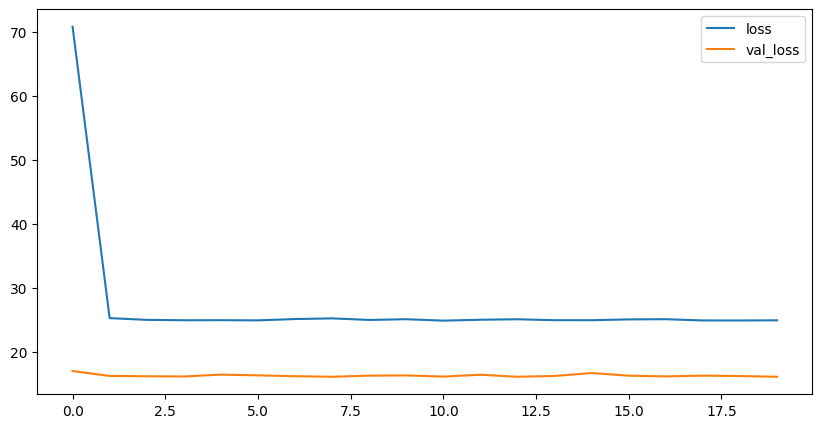

In [17]:
# 학습결과 시각화
plt.figure(figsize = (10, 5))
plt.plot(h.history['loss'], label = 'loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()